In [590]:
import gym
import numpy as np
from matplotlib import pyplot as plt

In [48]:
env = gym.make('FrozenLake-v0')
print(env.observation_space.n)
print(env.action_space.n)
env.render()

16
4

SFFF
FHFH
FFFH
HFFG


In [410]:
s = env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [501]:
controls = {}
controls[0] = 'Left'
controls[1] = 'Down'
controls[2] = 'Right'
controls[3] = 'Up'

In [499]:
# 0 -> Left
# 1 -> Down
# 2 -> Right
# 3 -> Up

s1,r,d,prob = env.step(2)
print(s1,r,d,prob)
env.render()

5 0 True {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG


In [450]:
np.random.randn(1,env.action_space.n)*(1./(i+1))

array([[  5.51099824e-05,  -8.03091822e-04,  -4.69109283e-04,
          7.66560302e-04]])

In [610]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8 # Learning rate
y = .95 # Discounted reword coeficient
num_episodes = 8000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
MA_window = 200
acummulated_average = []
debug = False
for i in range(num_episodes):
    started = False
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        # np.max(Q[s1,:]) -> Cual de todas las acciones tiene mayor valor cuando estoy en el esstado 
        # r + y*np.max(Q[s1,:]) -> Estimated discounted reward
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        
        rAll += r
        if debug:
            if (Q[s,a]>0) & (not started):
                print('episode:',i)
                started=True
            if started:
                print('desde:',s,', hasta',s1,', accion:',controls[a],Q[s,a], ', reward:',r)
                if d:
                    print('Finish!:', rAll)
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
    acummulated_average.append(float(sum(rList[-MA_window:]))/MA_window)

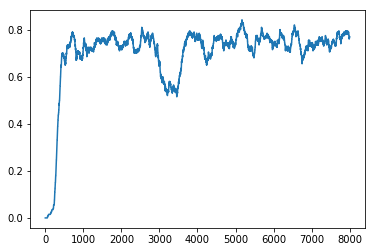

In [611]:
plt.plot(acummulated_average)
plt.show()

In [614]:
print("Score over time: " +  str(sum(rList)/num_episodes), float(sum(rList[-MA_window:]))/MA_window)

Score over time: 0.711125 0.77


In [56]:
Q.shape

(16, 4)

In [561]:
0.8*0.95*0.8

0.6080000000000001

In [459]:
# 0 -> Left
# 1 -> Down
# 2 -> Right
# 3 -> Up
Q[2]

array([ 0.12121799,  0.00049057,  0.00130459,  0.00139065])